<a href="https://colab.research.google.com/github/EleniHaylemeskel/Week-3-AI-Tools-Assignment/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# PART 2 - TASK 1: Classical Machine Learning with Scikit-learn
# Dataset: Iris Species
# Goal: Preprocess → Train Decision Tree → Evaluate


# --- Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# --- Step 1: Load Dataset ---
df = pd.read_csv("Iris.csv")

# Remove unnamed or unnecessary columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df.columns = df.columns.str.strip()

print("Dataset Loaded Successfully!")
print(df.head())

# --- Step 2: Check & Handle Missing Values ---
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing numeric values with median (if any)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing values in column: {col}")

# --- Step 3: Encode Label Column ---
label_col = "Species"
le = LabelEncoder()
df[label_col] = le.fit_transform(df[label_col])

print("\nLabel Encoding Completed!")
print("Classes:", le.classes_)

# --- Step 4: Prepare Features and Labels ---
# Remove ID column if present
feature_cols = [col for col in df.columns if col not in ["Species", "Id"]]

X = df[feature_cols]
y = df[label_col]

# --- Step 5: Split Train & Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData Split Completed!")
print("Training Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# --- Step 6: Train the Decision Tree Classifier ---
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

print("\nModel Training Completed!")

# --- Step 7: Predictions ---
y_pred = clf.predict(X_test)

# --- Step 8: Evaluation ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print("\n=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nTask 1 Completed Successfully! 🎉")

Dataset Loaded Successfully!
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Label Encoding Completed!
Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Data Split Completed!
Training Shape: (120, 4)
Test Shape: (30, 4)

Model Training Completed!

=== MODEL PERFORMANCE ===
Accuracy: 0.9333
Precision (Macro): 0.9333
Recall (Macro): 0.9333

Classification Report:
                 precision    recall  f1-score   support

    Iri

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 53ms/step - accuracy: 0.8801 - loss: 0.4068 - val_accuracy: 0.9847 - val_loss: 0.0606
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 91s 64ms/step - accuracy: 0.9809 - loss: 0.0606 - val_accuracy: 0.9862 - val_loss: 0.0482
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 61ms/step - accuracy: 0.9879 - loss: 0.0383 - val_accuracy: 0.9858 - val_loss: 0.0434
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.9912 - loss: 0.0291 - val_accuracy: 0.9905 - val_loss: 0.0330
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 88s 76ms/step - accuracy: 0.9928 - loss: 0.0236 - val_accuracy: 0.9903 - val_loss: 0.0341
313/313 - 3s - 8ms/step - accuracy: 0.9895 - loss: 0.0327

Test Accuracy: 0.9894999861717224
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


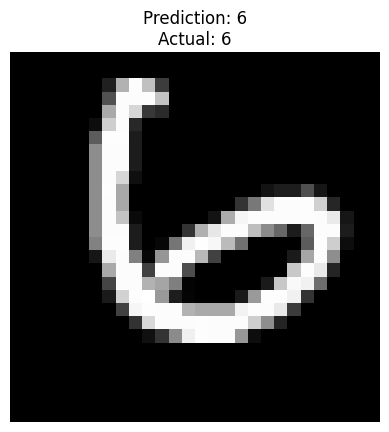

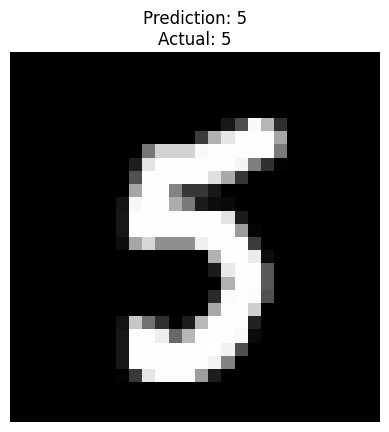

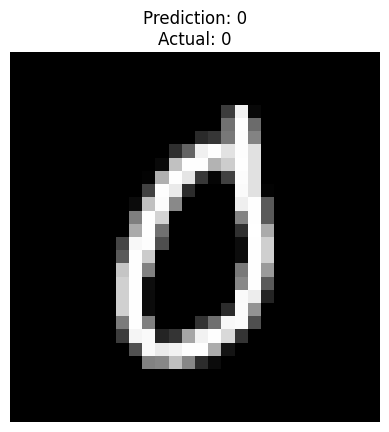

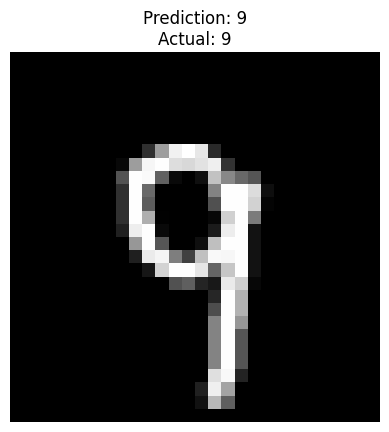

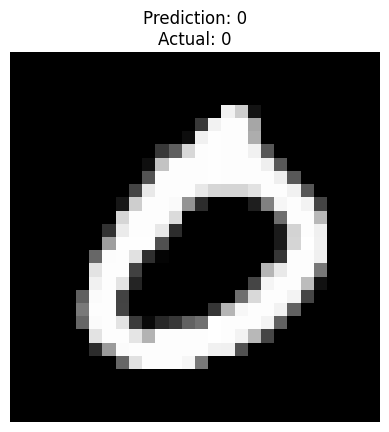

In [3]:
# PART 2 – TASK 2: Deep Learning with TensorFlow (MNIST CNN)
# Dataset: MNIST Handwritten Digits
# Goal: Build a Model → Test Accuracy → Visualize the Model

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


# 1. Load and Preprocess Data

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN: (batch, width, height, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# 2. Build CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 3. Train CNN Model

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


# 4. Evaluate on Test Set

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)


# 5. Visualize Predictions (5 Sample Images)

predictions = model.predict(x_test)

def plot_sample(i):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"Prediction: {np.argmax(predictions[i])}\nActual: {y_test[i]}")
    plt.axis("off")
    plt.show()

# Show 5 random samples
for i in np.random.randint(0, len(x_test), 5):
    plot_sample(i)
